# Homework 1
# Option 2: Add one new dataset into the sample code

### Check if torch is working

In [1]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision not available.")

torch version: 2.0.1
torchvision version: 0.15.2


In [2]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [3]:
!nvidia-smi

Fri Sep 22 12:03:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   23C    P0    23W / 250W |      2MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# Try to get torchinfo, install it if it doesn't work
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.") #pip install -q torchinfo

In [6]:
import os
from pathlib import Path
print("Current folder:", os.getcwd())

Current folder: /home/015957045/DeepDataMiningLearning/DeepDataMiningLearning


In [7]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Explore Data folder structure for Argoverse-1.1

In [1]:
import os
from pathlib import Path
import pandas as pd

In [2]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/

Argoverse-Terms_of_Use.txt  images  labels


In [3]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/images

test  train  val


In [4]:
!ls /data/cmpe249-fa23/Argoverse/Argoverse-1.1/labels

train  val


In [5]:
# Check name of folders in train 
image_data_path =  '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/train'
label_data_path = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/labels/train'

folders_imagedata = []
folders_labeldata = []

for path in Path(image_data_path).iterdir():
    if path.is_dir():
        str_path = str(path)
        temp = str(path).split('/')
        folders_imagedata.append(temp[-1])

for path in Path(label_data_path).iterdir():
    if path.is_dir():
        str_path = str(path)
        temp = str(path).split('/')
        folders_labeldata.append(temp[-1])
        
print(len(folders_imagedata))
print(len(folders_labeldata))

65
65


As you can see, the number of folders in train directory are the same for image and label. 

In [6]:
# Investigate the total number of images and labels
tot_img = 0
tot_lab = 0
for fold1, fold2 in zip(folders_imagedata, folders_labeldata):
    temp_path1 = image_data_path + '/' +  fold1 + '/ring_front_center'
    temp_path2 = image_data_path + '/' +  fold2 + '/ring_front_center'
    tot_img += len(os.listdir(temp_path1))
    tot_lab += len(os.listdir(temp_path2))
print(tot_img)
print(tot_lab)


39384
39384


In [7]:
image_path_list_val = list(Path('/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/val').glob("*/*/*.jpg"))
print('The total number of images in validation set: {}'.format(len(image_path_list_val)))

The total number of images in validation set: 15062


In [8]:
image_path_list_test = list(Path('/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/test').glob("*/*/*.jpg"))
print('The total number of images in test set: {}'.format(len(image_path_list_test)))

The total number of images in test set: 12507


## Load one sample image and label

In [22]:
from PIL import Image
import random
class_dic = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'bus', 5: 'truck', 6: 'traffic_light', 7: 'stop_sign'}
def read_image(seed_num):
    random.seed(seed_num)
    
    # 1. Get all image paths (* means "any combination")
    image_path_list = list(Path(image_data_path).glob("*/*/*.jpg"))
    # label_path_list = list(Path(label_data_path).glob("*/*/*.txt"))
    # print('The total number of images: {}'.format(len(image_path_list)))
    # print('The total number of labels: {}'.format(len(label_path_list)))
    
    # 2. Get a random image path
    random_image_path = random.choice(image_path_list)
    list_random_label_path = str(random_image_path).split('/')
    list_random_label_path[5] = 'labels'
    rename = list_random_label_path[-1].split('.')
    rename[-1] = 'txt'
    list_random_label_path[-1] = '.'.join(rename)
    random_label_path = Path('/'.join(list_random_label_path))
    
    # 3. Get image class from path name (the image class is the name of the directory where the image is stored)
    label_file = open(str(random_label_path), 'r')
    print(label_file.read())
    
    # 4. Open image
    img = Image.open(random_image_path)
    
    # 4. Print metadata
    print(f"Random image path: {random_image_path}")
    print(f"Image height: {img.height}") 
    print(f"Image width: {img.width}")
    display(img)
    
    

2 0.4986979166666667 0.59 0.1171875 0.13
2 0.8885416666666667 0.6554166666666666 0.0625 0.11083333333333334
2 0.7630208333333334 0.60375 0.178125 0.2125
0 0.7674479166666667 0.6241666666666666 0.06510416666666667 0.27
2 0.67734375 0.5620833333333334 0.1015625 0.1325
2 0.6286458333333333 0.5366666666666666 0.078125 0.10166666666666667
2 0.5098958333333333 0.5083333333333333 0.036458333333333336 0.02666666666666667
3 0.5729166666666666 0.5320833333333334 0.029166666666666667 0.0425
2 0.5635416666666667 0.5225 0.020833333333333332 0.041666666666666664
2 0.59296875 0.5304166666666666 0.0234375 0.060833333333333336
2 0.5596354166666667 0.5175 0.025520833333333333 0.03666666666666667
2 0.25286458333333334 0.5770833333333333 0.12864583333333332 0.12416666666666666
0 0.8299479166666667 0.6370833333333333 0.0578125 0.2525
0 0.8635416666666667 0.6458333333333334 0.057291666666666664 0.2916666666666667
0 0.018489583333333334 0.71 0.03697916666666667 0.295
1 0.029166666666666667 0.7929166666666667

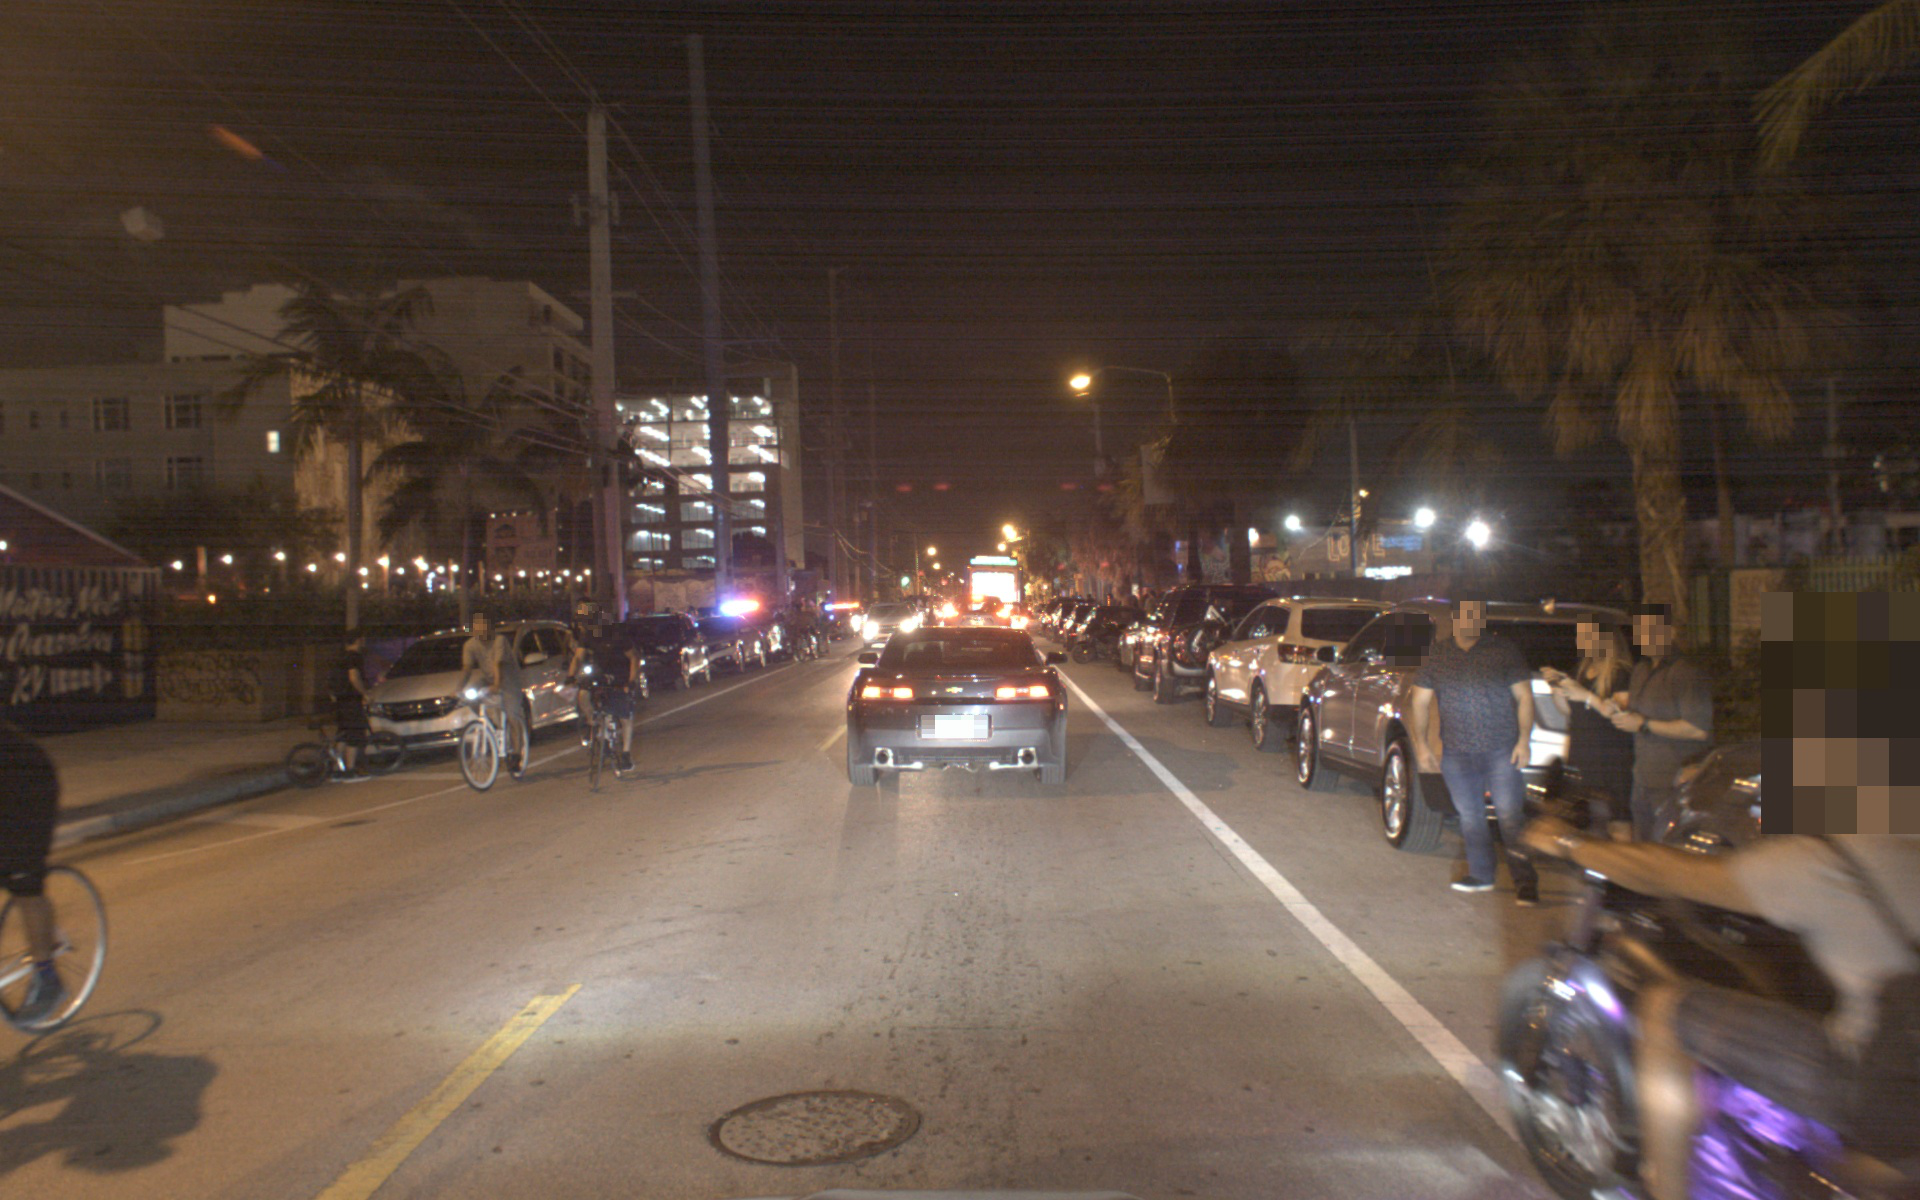

In [10]:
read_image(915)

## Convert Data to COCO Format
### References: 
https://www.kaggle.com/code/impiyush/simply-convert-data-to-coco-format
https://docs.ultralytics.com/datasets/detect/argoverse/#dataset-yaml   
https://medium.com/codable/convert-any-dataset-to-coco-object-detection-format-with-sahi-95349e1fe2b7

In [11]:
import numpy as np
import pandas as pd
import os
import json
import random
import cv2
import matplotlib.pyplot as plt
import ast
from tqdm import tqdm
from sahi.utils.coco import Coco, CocoCategory, CocoImage, CocoAnnotation
from sahi.utils.file import save_json
import shutil

In [23]:
# reference: https://medium.com/codable/convert-any-dataset-to-coco-object-detection-format-with-sahi-95349e1fe2b7

def convert_to_COCO(image_path, json_name):
    #1. Init COCO object
    coco = Coco()

    #2. Add categories (starting from id=0)
    for key, item in class_dic.items():
        coco.add_category(CocoCategory(id = key, name = item))

    #3. Get image and label paths
    image_path_list = list(Path(image_path).glob("*/*/*.jpg"))
    label_path_list = []
    for p in image_path_list:
        temp_p = str(p).split('/')
        temp_p[5] = 'labels'
        rename = temp_p[-1].split('.')
        rename[-1] = 'txt'
        temp_p[-1] = '.'.join(rename)
        label_path_list.append(Path('/'.join(temp_p)))
    print(f'the number of images: {len(image_path_list)}')
    print(f'the number of labels: {len(label_path_list)}')

    #4. Create a COCO image
    no_annotation = 0
    for img_path, l_path in zip(image_path_list, label_path_list):
        f_name = str(img_path).split('/')
        ImageHeight = float(Image.open(img_path).height)
        Imagewidth = float(Image.open(img_path).width)
        
        if os.path.isfile(l_path):
            coco_image = CocoImage(file_name = '/'.join(f_name[-3:]), height = ImageHeight, width = Imagewidth)
            with open(str(l_path)) as f:
                lines = f.readlines()
                for line in lines:
                    line = line.strip()
                    temp_line_list = line.split(' ')
                    obj_class, x_yolo, y_yolo, width_yolo, height_yolo = temp_line_list
                    cat_name = class_dic[int(obj_class)]
                    width_coco = float(width_yolo)*Imagewidth
                    height_coco = float(height_yolo)*ImageHeight
                    x_coco = float(x_yolo)*Imagewidth - (width_coco /2)
                    y_coco = float(y_yolo)*ImageHeight - (height_coco/2)
                    bbox = [x_coco, y_coco, width_coco, height_coco]
                    
                    coco_image.add_annotation(CocoAnnotation(bbox = bbox, 
                                                             category_id = int(obj_class), 
                                                             category_name = cat_name))
            coco.add_image(coco_image)
        else:
            no_annotation += 1
            continue

    print(f"The number of images that don't have label: {no_annotation}")

    #5. save as json file
    print('.......Creating COCO Json File.......')
    save_path = '/data/cmpe249-fa23/argo1COCO/' + json_name
    save_json(data=coco.json, save_path=save_path)
    print('DONE')
    
    

In [24]:
image_path = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/val'
json_name_file = 'argo1_val_all.json'
convert_to_COCO(image_path, json_name_file)

the number of images: 15062
the number of labels: 15062
The number of images that don't have label: 7
.......Creating COCO Json File.......
DONE


In [20]:
print(coco.json['images'][0])

{'height': 1200, 'width': 1920, 'id': 1, 'file_name': '08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969043929037240.jpg'}


In [21]:
print(coco.json['annotations'][0])

{'iscrowd': 0, 'image_id': 1, 'bbox': [1630.0, 669.0000000000001, 290.0, 530.9999999999999], 'segmentation': [], 'category_id': 5, 'id': 1, 'area': 153989}


Random image path: /data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/train/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969050156136640.jpg


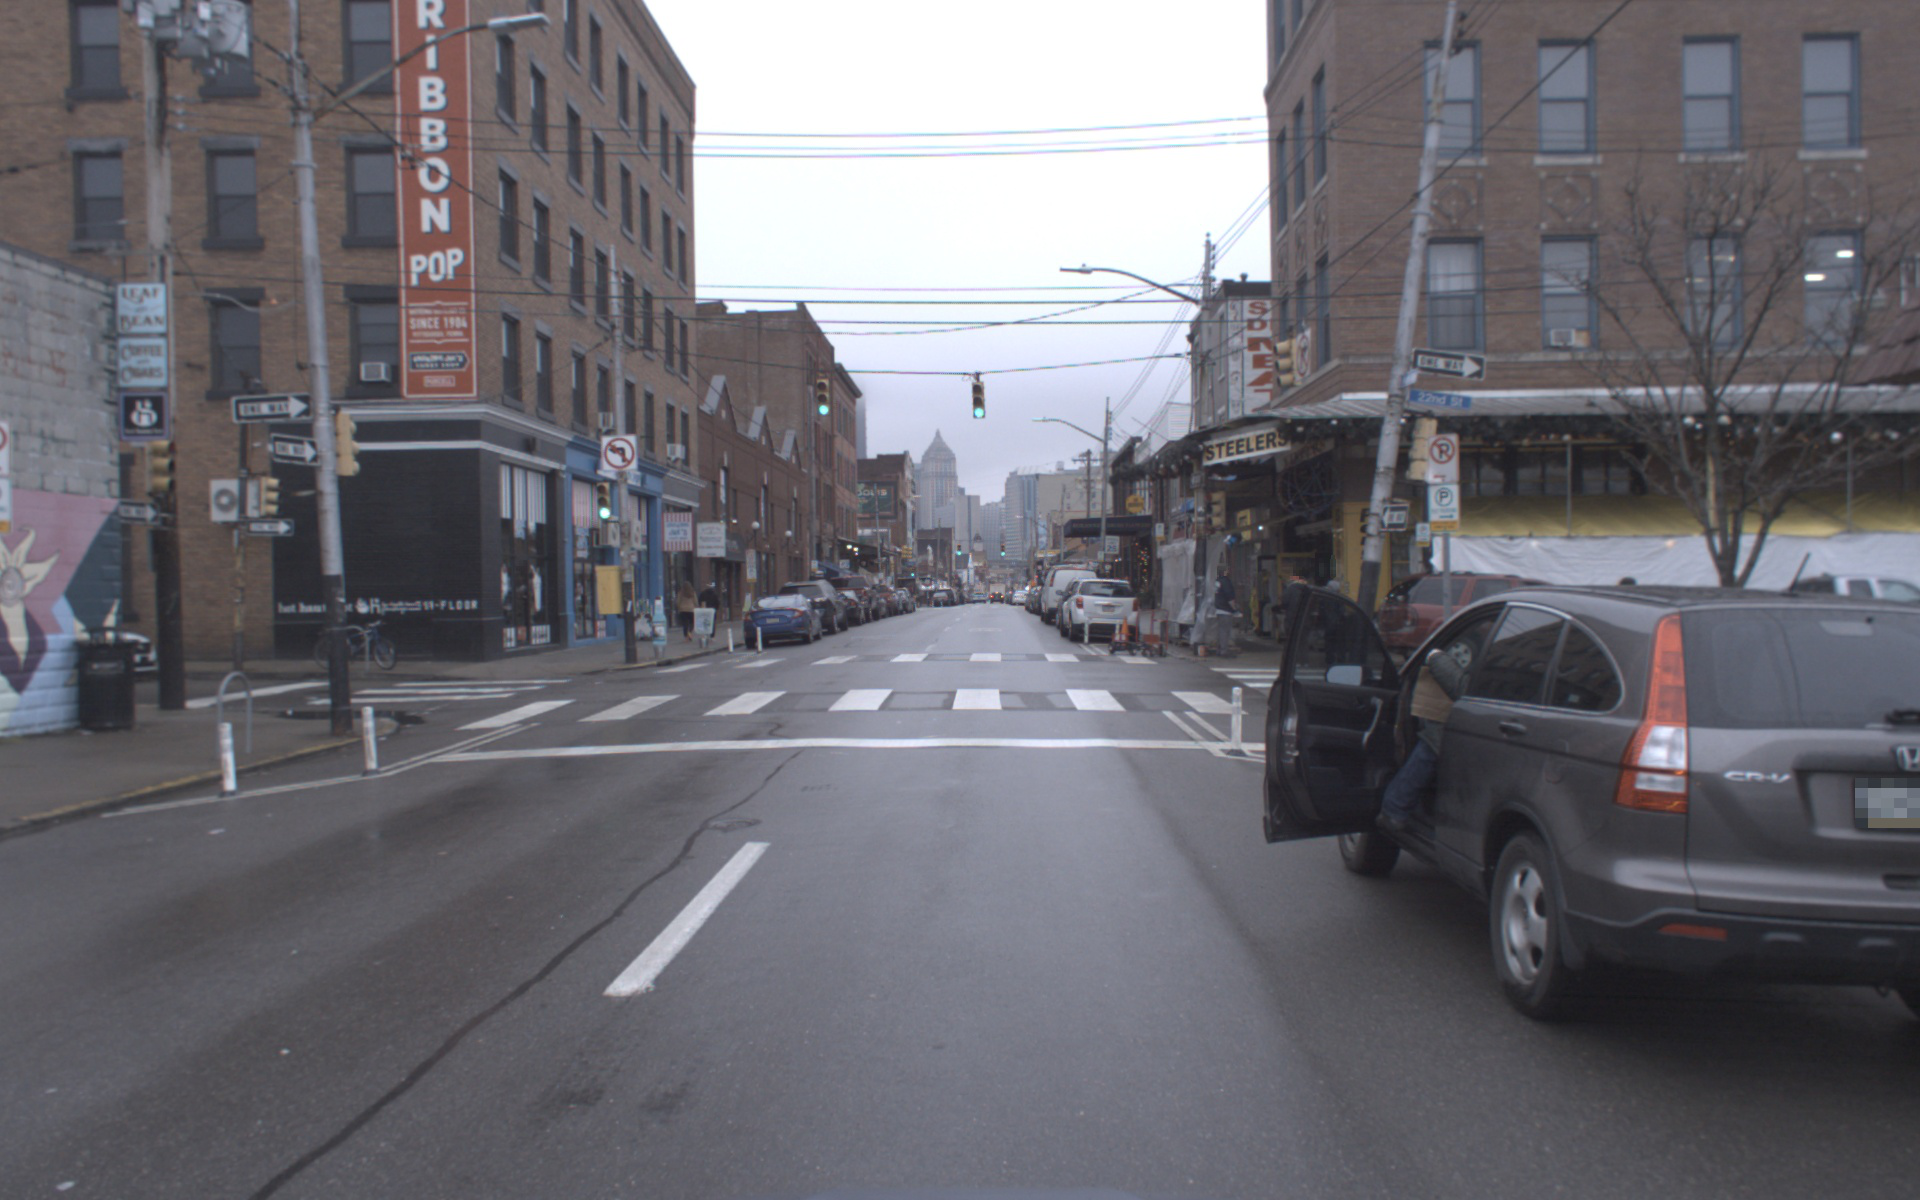

2 0.8291666666666667 0.6733333333333333 0.3416666666666667 0.37
0 0.7411458333333333 0.6154166666666666 0.052083333333333336 0.15083333333333335
2 0.7619791666666667 0.5129166666666667 0.09166666666666666 0.07416666666666667
2 0.4075520833333333 0.5170833333333333 0.04114583333333333 0.04583333333333333
2 0.42401041666666667 0.5055000000000001 0.036354166666666646 0.046499999999999965
6 0.66953125 0.30333333333333334 0.013020833333333334 0.04
6 0.5100520833333333 0.3338333333333333 0.0078125 0.03133333333333335
6 0.42890625 0.3308333333333333 0.0078125 0.03166666666666667
6 0.3144791666666667 0.4170833333333333 0.007291666666666667 0.0311666666666666
5 0.5572916666666666 0.49558333333333326 0.030208333333333334 0.05149999999999996
2 0.5313020833333333 0.49774999999999997 0.008854166666666607 0.0125
2 0.5197482638888888 0.49875 0.0078125 0.010833333333333334
2 0.49296875 0.4970833333333333 0.0140625 0.015833333333333335
6 0.52265625 0.45925 0.00302083333333331 0.010833333333333334
6 0.4

In [113]:
# show example
ex = image_data_path + '/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969050156136640.jpg'
l_ex = label_data_path + '/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969050156136640.txt'
img = Image.open(ex)
print(f"Random image path: {ex}")
display(img)
label_file = open(str(l_ex), 'r')
print(label_file.read())

## dataset_argococo.py

In [114]:
#ref: https://github.com/lkk688/WaymoObjectDetection/blob/master/MyDetector/torchvision_waymococo_train.py
import torch
import torchvision
import numpy as np
from torchvision import datasets, transforms
from glob import glob
import os
import math
import itertools
import torch.utils.data as data
from pycocotools.coco import COCO

class Argo1COCODataset(torch.utils.data.Dataset):
    def __init__(self, root, annotation, train=True, transform=None):
        self.root = root
        self.transform = transform
        self.coco = COCO(annotation)
        self.is_train = train
        self.ids = list(sorted(self.coco.imgs.keys())) #id string list

        #
        dataset=self.coco.dataset #'images': image filename (images/xxx.jpg) with image_id (0000001)
        imgToAnns=self.coco.imgToAnns #image_id to list of annotations
        catToImgs =self.coco.catToImgs #three classes, 1,2,4
        cats=self.coco.cats

        #num_classes=5 # ['unknown', 'vehicle', 'pedestrian', 'sign', 'cyclist']
        #previous_num_classes = 4 #Unknown:0, Vehicles: 1, Pedestrians: 2, Cyclists: 3, Signs (removed)
        #Real data only has 
        self.INSTANCE_CATEGORY_NAMES = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'truck', 'traffic_light', 'stop_sign']
        self.numclass = len(self.INSTANCE_CATEGORY_NAMES)
        #self.INSTANCE2id = {'__background__':0, 'Vehicles': 1, 'Pedestrians': 2, 'Cyclists': 4} #background is 0
        #self.id2INSTANCE = {v: k for k, v in self.INSTANCE2id.items()}
        #In annotation, class is 1,2,4

    
    def _get_target(self, id):
        'Get annotations for sample'

        # List: get annotation id from coco
        ann_ids = self.coco.getAnnIds(imgIds=id) # 1 or 2 ...
        # Dictionary: target coco_annotation file for an image
        #ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py    
        annotations = self.coco.loadAnns(ann_ids) 

        # if id == 1:
        #     print(f"annotations: {annotations}")
        #     print(f"len: {len(annotations)}")

        boxes, categories = [], []
        for ann in annotations:
            if ann['bbox'][2] < 1 and ann['bbox'][3] < 1:
                continue
            boxes.append(ann['bbox'])
            cat = ann['category_id']
            categories.append(cat)

        target = (torch.FloatTensor(boxes),
                  torch.FloatTensor(categories).unsqueeze(1))

        return target


    def __getitem__(self, index):
        """
        Args:
            index (int): Index
        Returns:
            tuple: Tuple (image, target). target is the object returned by ``coco.loadAnns``.
        """
        # Own coco file
        coco = self.coco
        # Image ID
        img_id = self.ids[index]
        imginfo=self.coco.imgs[img_id]
        path_train_or_val = 'train/' if self.is_train else 'val/'
        path = path_train_or_val + imginfo['file_name'] 
        #print(f'index: {index}, img_id:{img_id}, info: {imginfo}')

        # path for input image
        #loadedimglist=coco.loadImgs(img_id)
        # print(loadedimglist)
        #path = coco.loadImgs(img_id)[0]['file_name']
        #print("image path:", path)
        # open the input image
        img = Image.open(os.path.join(self.root, path)).convert('RGB')
        #img = Image.open(os.path.join(self.root, path)).convert('RGB')

        
        if index == 1:
            display(img)
            print(f'image info: {path}')

        # List: get annotation id from coco
        #ann_ids = coco.getAnnIds(imgIds=img_id)
        annolist=[self.coco.imgToAnns[img_id]]
        anns = list(itertools.chain.from_iterable(annolist))
        ann_ids = [ann['id'] for ann in anns]
        # Dictionary: target coco_annotation file for an image
        #ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocotools/coco.py
        targets  = coco.loadAnns(ann_ids)
        #targets=self.anns[ann_ids]
        #print("targets:", targets)
        
        #image_id = targets["image_id"].item()

        # number of objects in the image
        num_objs = len(targets)

        # Bounding boxes for objects
        # In coco format, bbox = [xmin, ymin, width, height]
        # In pytorch, the input should be [xmin, ymin, xmax, ymax]
        target = {}
        target_bbox = []
        target_labels = []
        target_areas = []
        target_crowds = []
        for i in range(num_objs):
            xmin = targets[i]['bbox'][0]
            ymin = targets[i]['bbox'][1]
            width = targets[i]['bbox'][2]
            xmax = xmin + width
            height = targets[i]['bbox'][3]
            ymax = ymin + height
            if xmin<=xmax and ymin<=ymax and xmin>=0 and ymin>=0 and width>1 and height>1:
                target_bbox.append([xmin, ymin, xmax, ymax])
                target_labels.append(targets[i]['category_id'])
                target_crowds.append(targets[i]['iscrowd'])
                target_areas.append(targets[i]['area'])
        num_bbox=len(target_bbox)
        assert num_objs == num_bbox
        #print("target_bbox len:", num_objs)
        if num_objs>0:
            #print("target_labels:", target_labels)
            target['boxes'] = torch.as_tensor(target_bbox, dtype=torch.float32)
            # Labels int value for class
            target['labels'] = torch.as_tensor(np.array(target_labels), dtype=torch.int64)
            #target['image_id'] = torch.tensor([int(img_id)])
            #target['image_id'] = torch.tensor(int(img_id))
            target['image_id'] = int(img_id)
            #torch.tensor([int(frameitem.context.name.split("_")[-2] + str(index))])
            target["area"] = torch.as_tensor(np.array(target_areas), dtype=torch.float32)
            target["iscrowd"] = torch.as_tensor(np.array(target_crowds), dtype=torch.int64)#torch.zeros((len(target['boxes'])), dtype=torch.int64)
        else:
            #negative example, ref: https://github.com/pytorch/vision/issues/2144
            target['boxes'] = torch.zeros((0, 4), dtype=torch.float32)#not empty
            target['labels'] = torch.as_tensor(np.array(target_labels), dtype=torch.int64)#empty
            #target['image_id'] = torch.tensor([int(img_id)])
            #target['image_id'] = torch.tensor(int(img_id))
            target['image_id'] = int(img_id)
            target["area"] = torch.as_tensor(np.array(target_areas), dtype=torch.float32)#empty
            target["iscrowd"] = torch.as_tensor(np.array(target_crowds), dtype=torch.int64)#empty

        if self.transform:
            img, target = self.transform(img, target)
        return img, target

    def __len__(self):
        return len(self.ids)

import DeepDataMiningLearning.detection.transforms as T
def get_transformsimple():
    transforms = []
    transforms.append(T.PILToTensor())
    transforms.append(T.ToDtype(torch.float, scale=True))
    # if train:
    #     transforms.append(RandomHorizontalFlip(0.5))
    return T.Compose(transforms)



In [115]:
data_root = '/data/cmpe249-fa23/Argoverse/Argoverse-1.1/images/'
ann_file = '/data/cmpe249-fa23/argo1COCO/argo1_10K.json'
myargo1coco = Argo1COCODataset(root=data_root,  
                          annotation=ann_file,
                          transform=get_transformsimple())
length = len(myargo1coco)
print("Dataset",length)#85008
img, target = myargo1coco[0]
print(target.keys())

loading annotations into memory...
Done (t=1.09s)
creating index...
index created!
Dataset 19061
dict_keys(['boxes', 'labels', 'image_id', 'area', 'iscrowd'])


In [116]:
ex_target = myargo1coco._get_target(1)
ex_target

(tensor([[1630.0000,  669.0000,  290.0000,  531.0000],
         [   0.0000,  783.0000,   17.0000,  106.0000],
         [ 249.0000,  638.0000,  298.0000,  158.0000],
         [1367.0000,  563.0000,  130.0000,   78.0000],
         [1093.0000,  577.0000,  132.0000,  114.0000],
         [ 658.0000,  611.0000,  107.0000,   72.0000],
         [ 724.0000,  588.0000,   91.0000,   73.0000],
         [1056.0000,  585.0000,   60.0000,   60.0000],
         [ 850.0000,  557.0000,    5.0000,   15.0000],
         [ 929.0000,  521.0000,    6.0000,   11.0000],
         [1013.0000,  589.0000,   14.0000,   35.0000],
         [ 990.0000,  598.0000,   14.0000,   10.0000],
         [ 971.0000,  597.0000,   14.0000,   11.0000],
         [1008.0000,  583.0000,   20.0000,   26.0000],
         [ 888.0000,  596.5000,   31.5000,   23.5000],
         [ 791.0000,  591.0000,   52.0000,   61.0000],
         [ 460.0000,  593.0000,   42.0000,   69.0000],
         [1495.0000,  562.0000,  139.0000,   74.0000],
         [

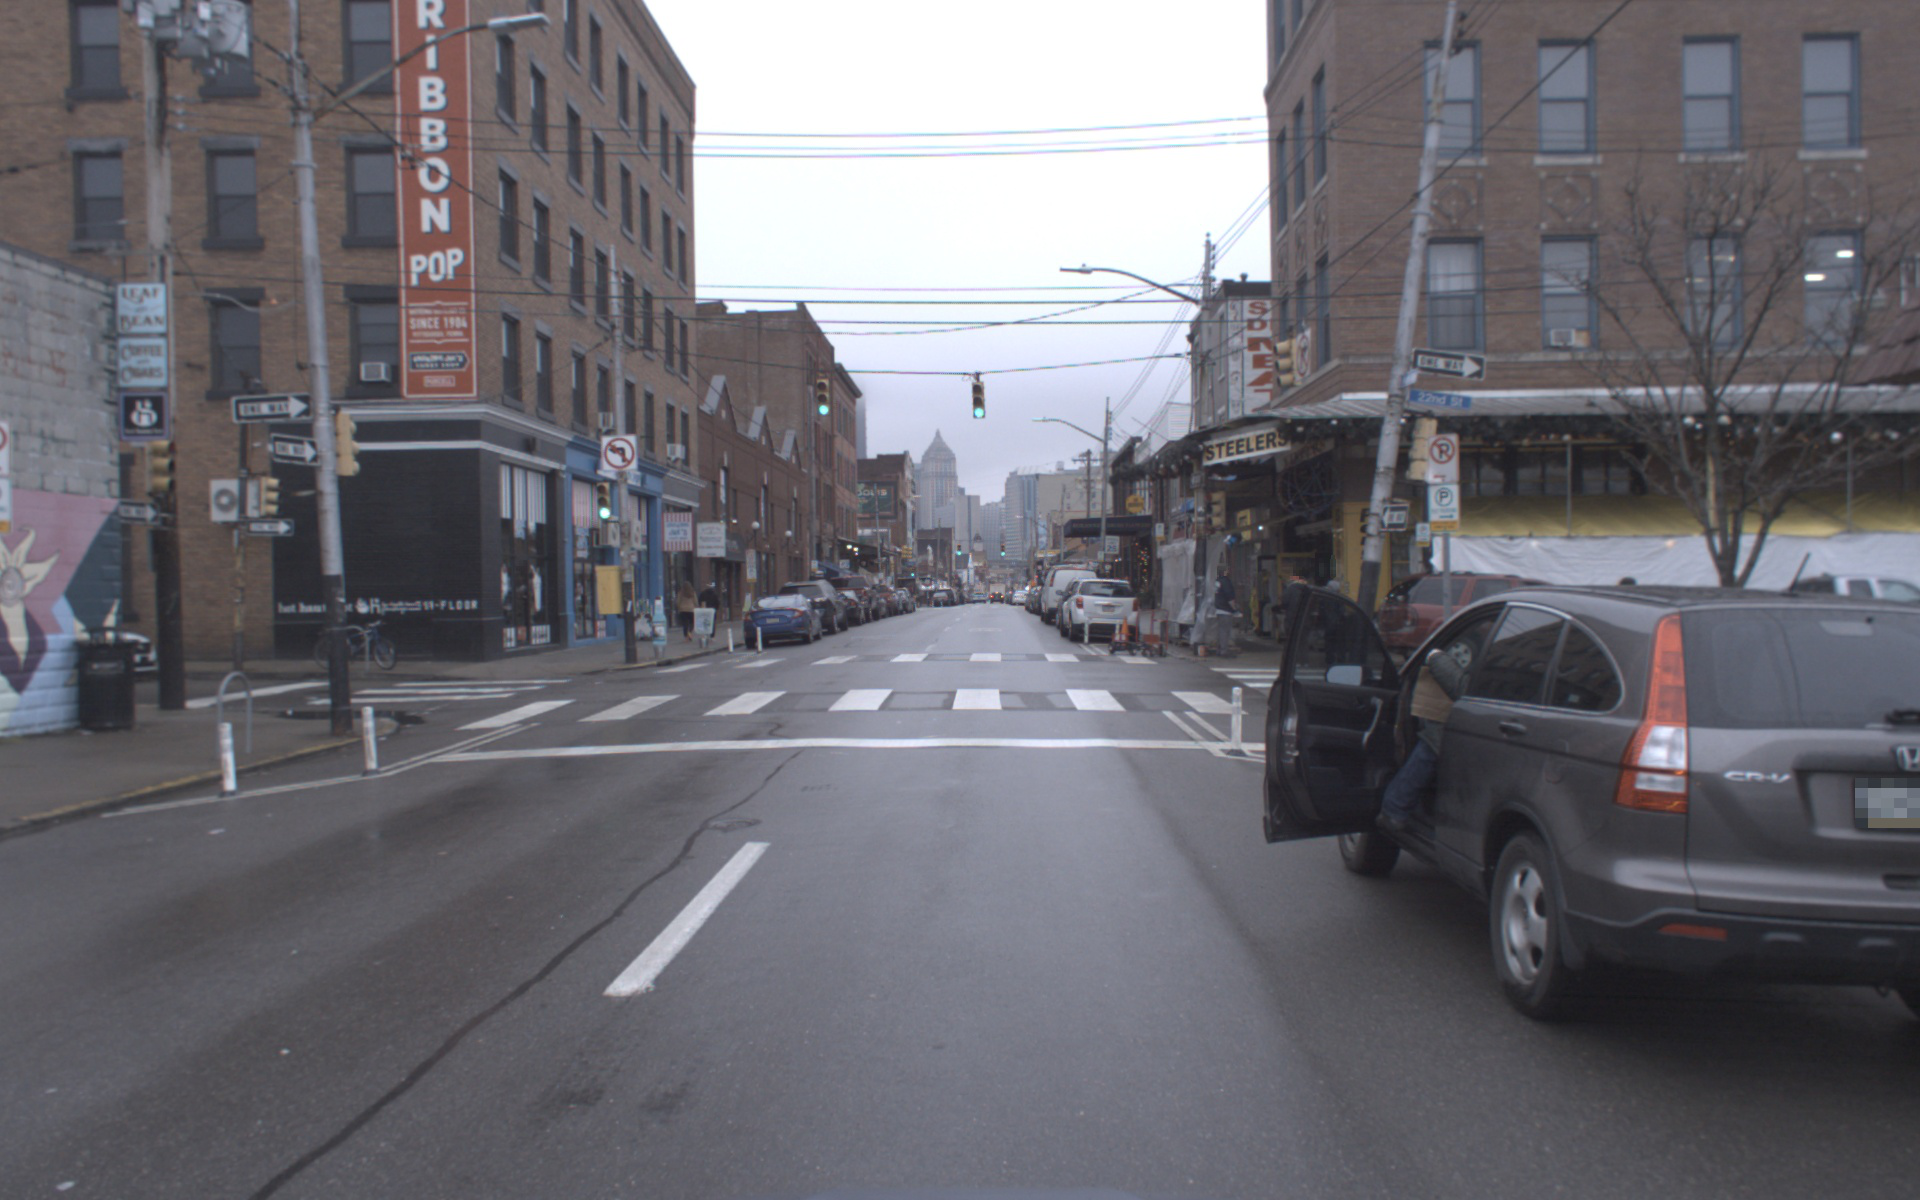

image info: train/08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2/ring_front_center/ring_front_center_315969050156136640.jpg


(tensor([[[0.4196, 0.4235, 0.4235,  ..., 0.3961, 0.3961, 0.3961],
          [0.4275, 0.4275, 0.4275,  ..., 0.3922, 0.3922, 0.3961],
          [0.4314, 0.4314, 0.4314,  ..., 0.3922, 0.3922, 0.4000],
          ...,
          [0.3255, 0.3294, 0.3333,  ..., 0.2745, 0.2745, 0.2784],
          [0.3333, 0.3412, 0.3412,  ..., 0.2824, 0.2824, 0.2863],
          [0.3333, 0.3451, 0.3451,  ..., 0.2863, 0.2902, 0.2941]],
 
         [[0.3647, 0.3686, 0.3686,  ..., 0.3608, 0.3608, 0.3608],
          [0.3725, 0.3725, 0.3725,  ..., 0.3569, 0.3569, 0.3608],
          [0.3765, 0.3765, 0.3765,  ..., 0.3569, 0.3569, 0.3647],
          ...,
          [0.3294, 0.3333, 0.3373,  ..., 0.2745, 0.2745, 0.2706],
          [0.3373, 0.3451, 0.3451,  ..., 0.2824, 0.2824, 0.2784],
          [0.3373, 0.3490, 0.3490,  ..., 0.2863, 0.2902, 0.2863]],
 
         [[0.3608, 0.3647, 0.3647,  ..., 0.3804, 0.3804, 0.3804],
          [0.3608, 0.3608, 0.3686,  ..., 0.3765, 0.3765, 0.3804],
          [0.3647, 0.3647, 0.3647,  ...,

In [117]:
myargo1coco.__getitem__(1)